## EDA

The first visualization compares the average violent crime rate per 100,000 residents across U.S. states using the most recent year of data (2015) from The Marshall Project’s crime dataset. Presenting the states side‑by‑side allows users like Alex and Alexandra to quickly identify which regions tend to have higher or lower levels of violent crime. This supports their need to narrow down potential destinations before exploring specific cities in more detail.

The second visualization focuses on New York City and shows how violent crime rates have changed over time. Examining long‑term trends helps users understand whether crime in a particular location is improving, worsening, or remaining stable. This is especially important for families planning a long‑term move, as it provides insight into the future safety of the area rather than relying on a single year of data.

Together, these visualizations demonstrate that the dataset used in our project can support geographic comparisons, filtering by location, and trend analysis, which are key components of the Crime Statistics US dashboard described in our project repository.


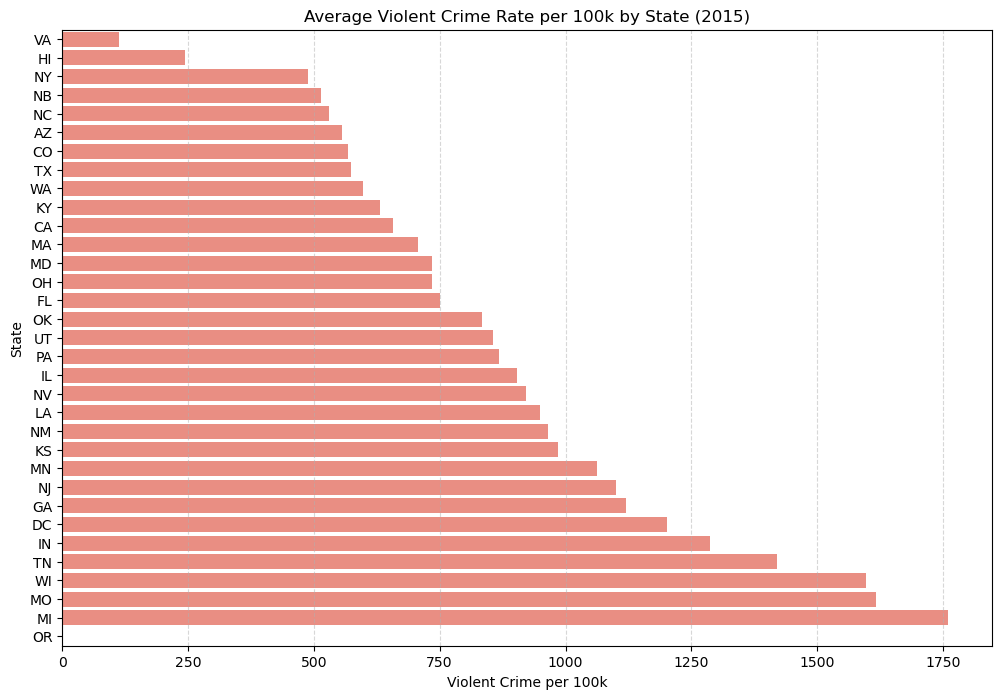

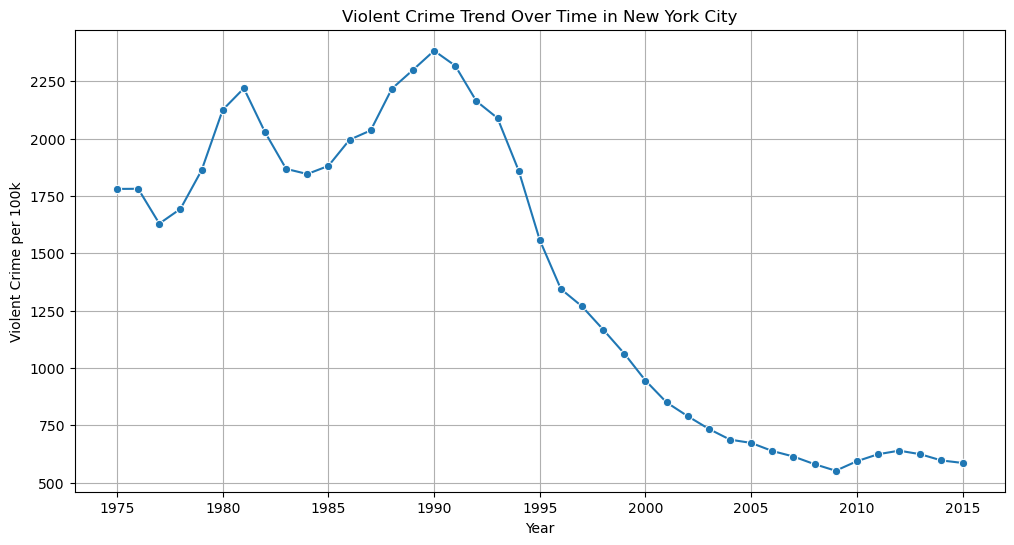

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
url = "https://raw.githubusercontent.com/themarshallproject/city-crime/master/data/ucr_crime_1975_2015.csv"
df = pd.read_csv(url)

# Keep only relevant columns
df = df[['ORI', 'year', 'department_name', 'total_pop', 'violent_crime',
         'violent_per_100k', 'homs_per_100k', 'rape_per_100k',
         'rob_per_100k', 'agg_ass_per_100k']]


# Visualization 1: Violent Crime Rates Across States

# State is encoded in the first two characters of ORI
df['state'] = df['ORI'].str[:2]

latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year]

state_summary = (
    df_latest.groupby('state')['violent_per_100k']
    .mean()
    .sort_values()
    .reset_index()
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=state_summary,
    x='violent_per_100k',
    y='state',
    color="salmon"
)
plt.title(f"Average Violent Crime Rate per 100k by State ({latest_year})")
plt.xlabel("Violent Crime per 100k")
plt.ylabel("State")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


# Visualization 2: Crime Trend Over Time for a Selected City (New York City)

ori_code = "NY03030"  # New York

df_city = df[df['ORI'] == ori_code]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_city,
    x='year',
    y='violent_per_100k',
    marker='o'
)
plt.title("Violent Crime Trend Over Time in New York City")
plt.xlabel("Year")
plt.ylabel("Violent Crime per 100k")
plt.grid(True)
plt.show()
